#Load libraries

In [ ]:
# to develop the model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import datetime, os # for tensorBoard

#Load dataset and normalize

In [ ]:
# loading the datase
mnist = tf.keras.datasets.mnist
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

# divide by 255 (maximum value for the pixel) to normalize (0-1 range)


#Develop the model using sequential API

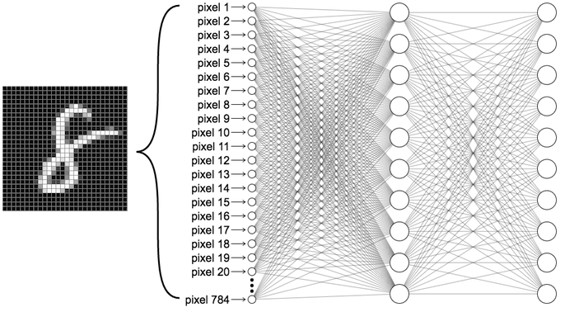

In [ ]:


# or use:
#model = Sequential()
#model.add(Flatten(input_shape=(28, 28)))
#model.add(Dense(10, "relu"))
#model.add(Dense(10, "softmax"))

#Compile, train, and check the performance

In [ ]:
# callbacks for tensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.005, verbose=1, patience=3)

# compile the model


# train the model


# check the performance in the test dataset


#Check caracteristics of the trained model

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

#Specify the model using functional API

In [ ]:
# load the missing libraries
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

# define the model


# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# train the model
model.fit(trainData, trainLabels, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback, es])

# check the performance in the test dataset
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=2)
print('\nTest accuracy:', test_acc)

# check tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

#Specify the model using model subclassing

In [ ]:
# define the model
class CustomModel(Model):
  def __init__(self, **kwargs):
    super(CustomModel, self).__init__(**kwargs)
    self.layer_1 = Flatten()
    self.layer_2 = Dense(10, "relu")
    self.layer_3 = Dense(10, "softmax")
  def call(self, inputs):
    x = self.layer_1(inputs)
    x = self.layer_2(x)
    x = self.layer_3(x)
    return x
model = CustomModel()

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# train the model
model.fit(trainData, trainLabels, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback, es])

# check the performance in the test dataset
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=2)
print('\nTest accuracy:', test_acc)

# check tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

#Define a deeper model with three hidden layers

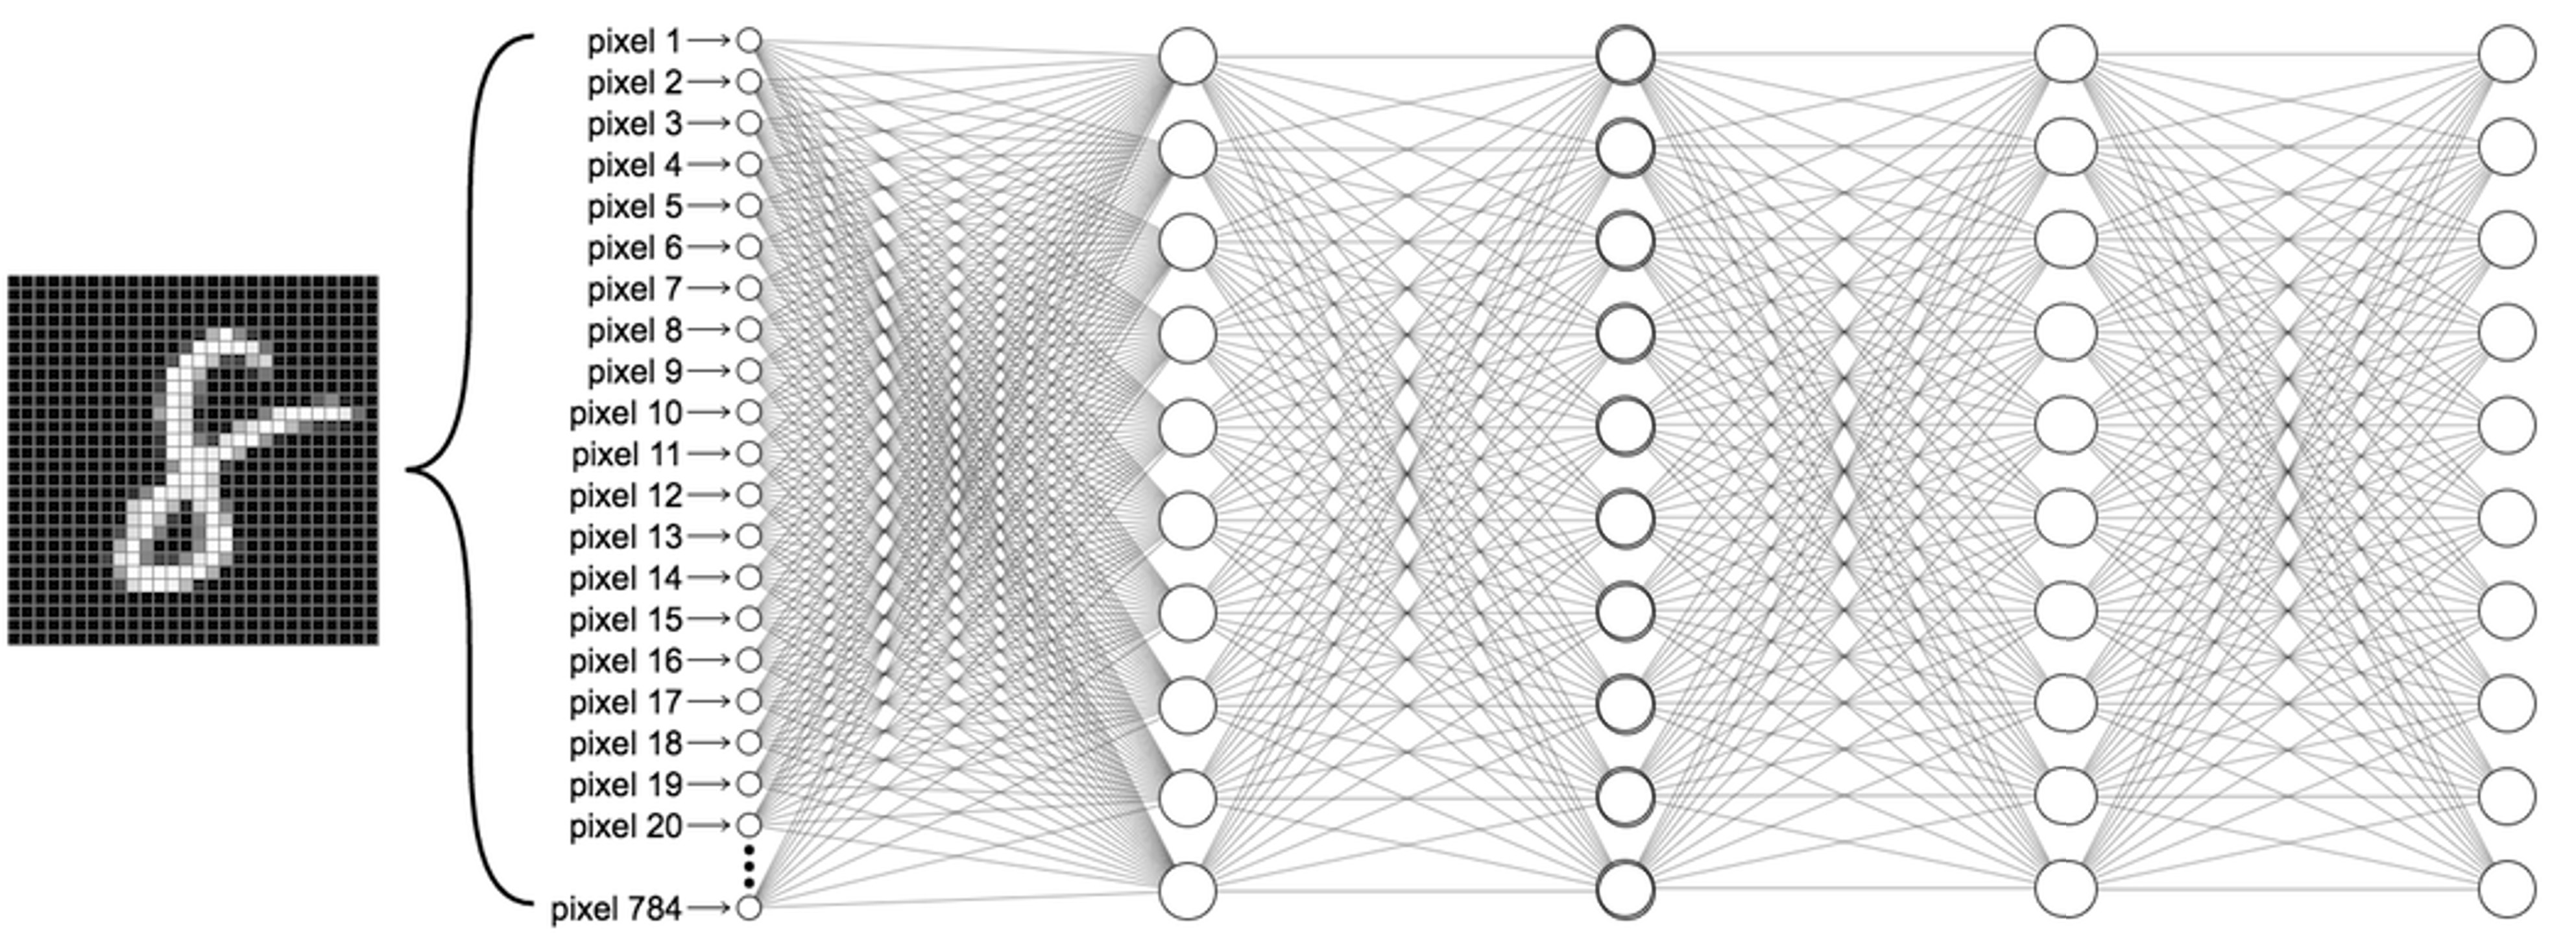

In [ ]:
# define the model with a cascade sequence of layers


# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# train the model
model.fit(trainData, trainLabels, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback, es])

# check the performance in the test dataset
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=2)
print('\nTest accuracy:', test_acc)

# check tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

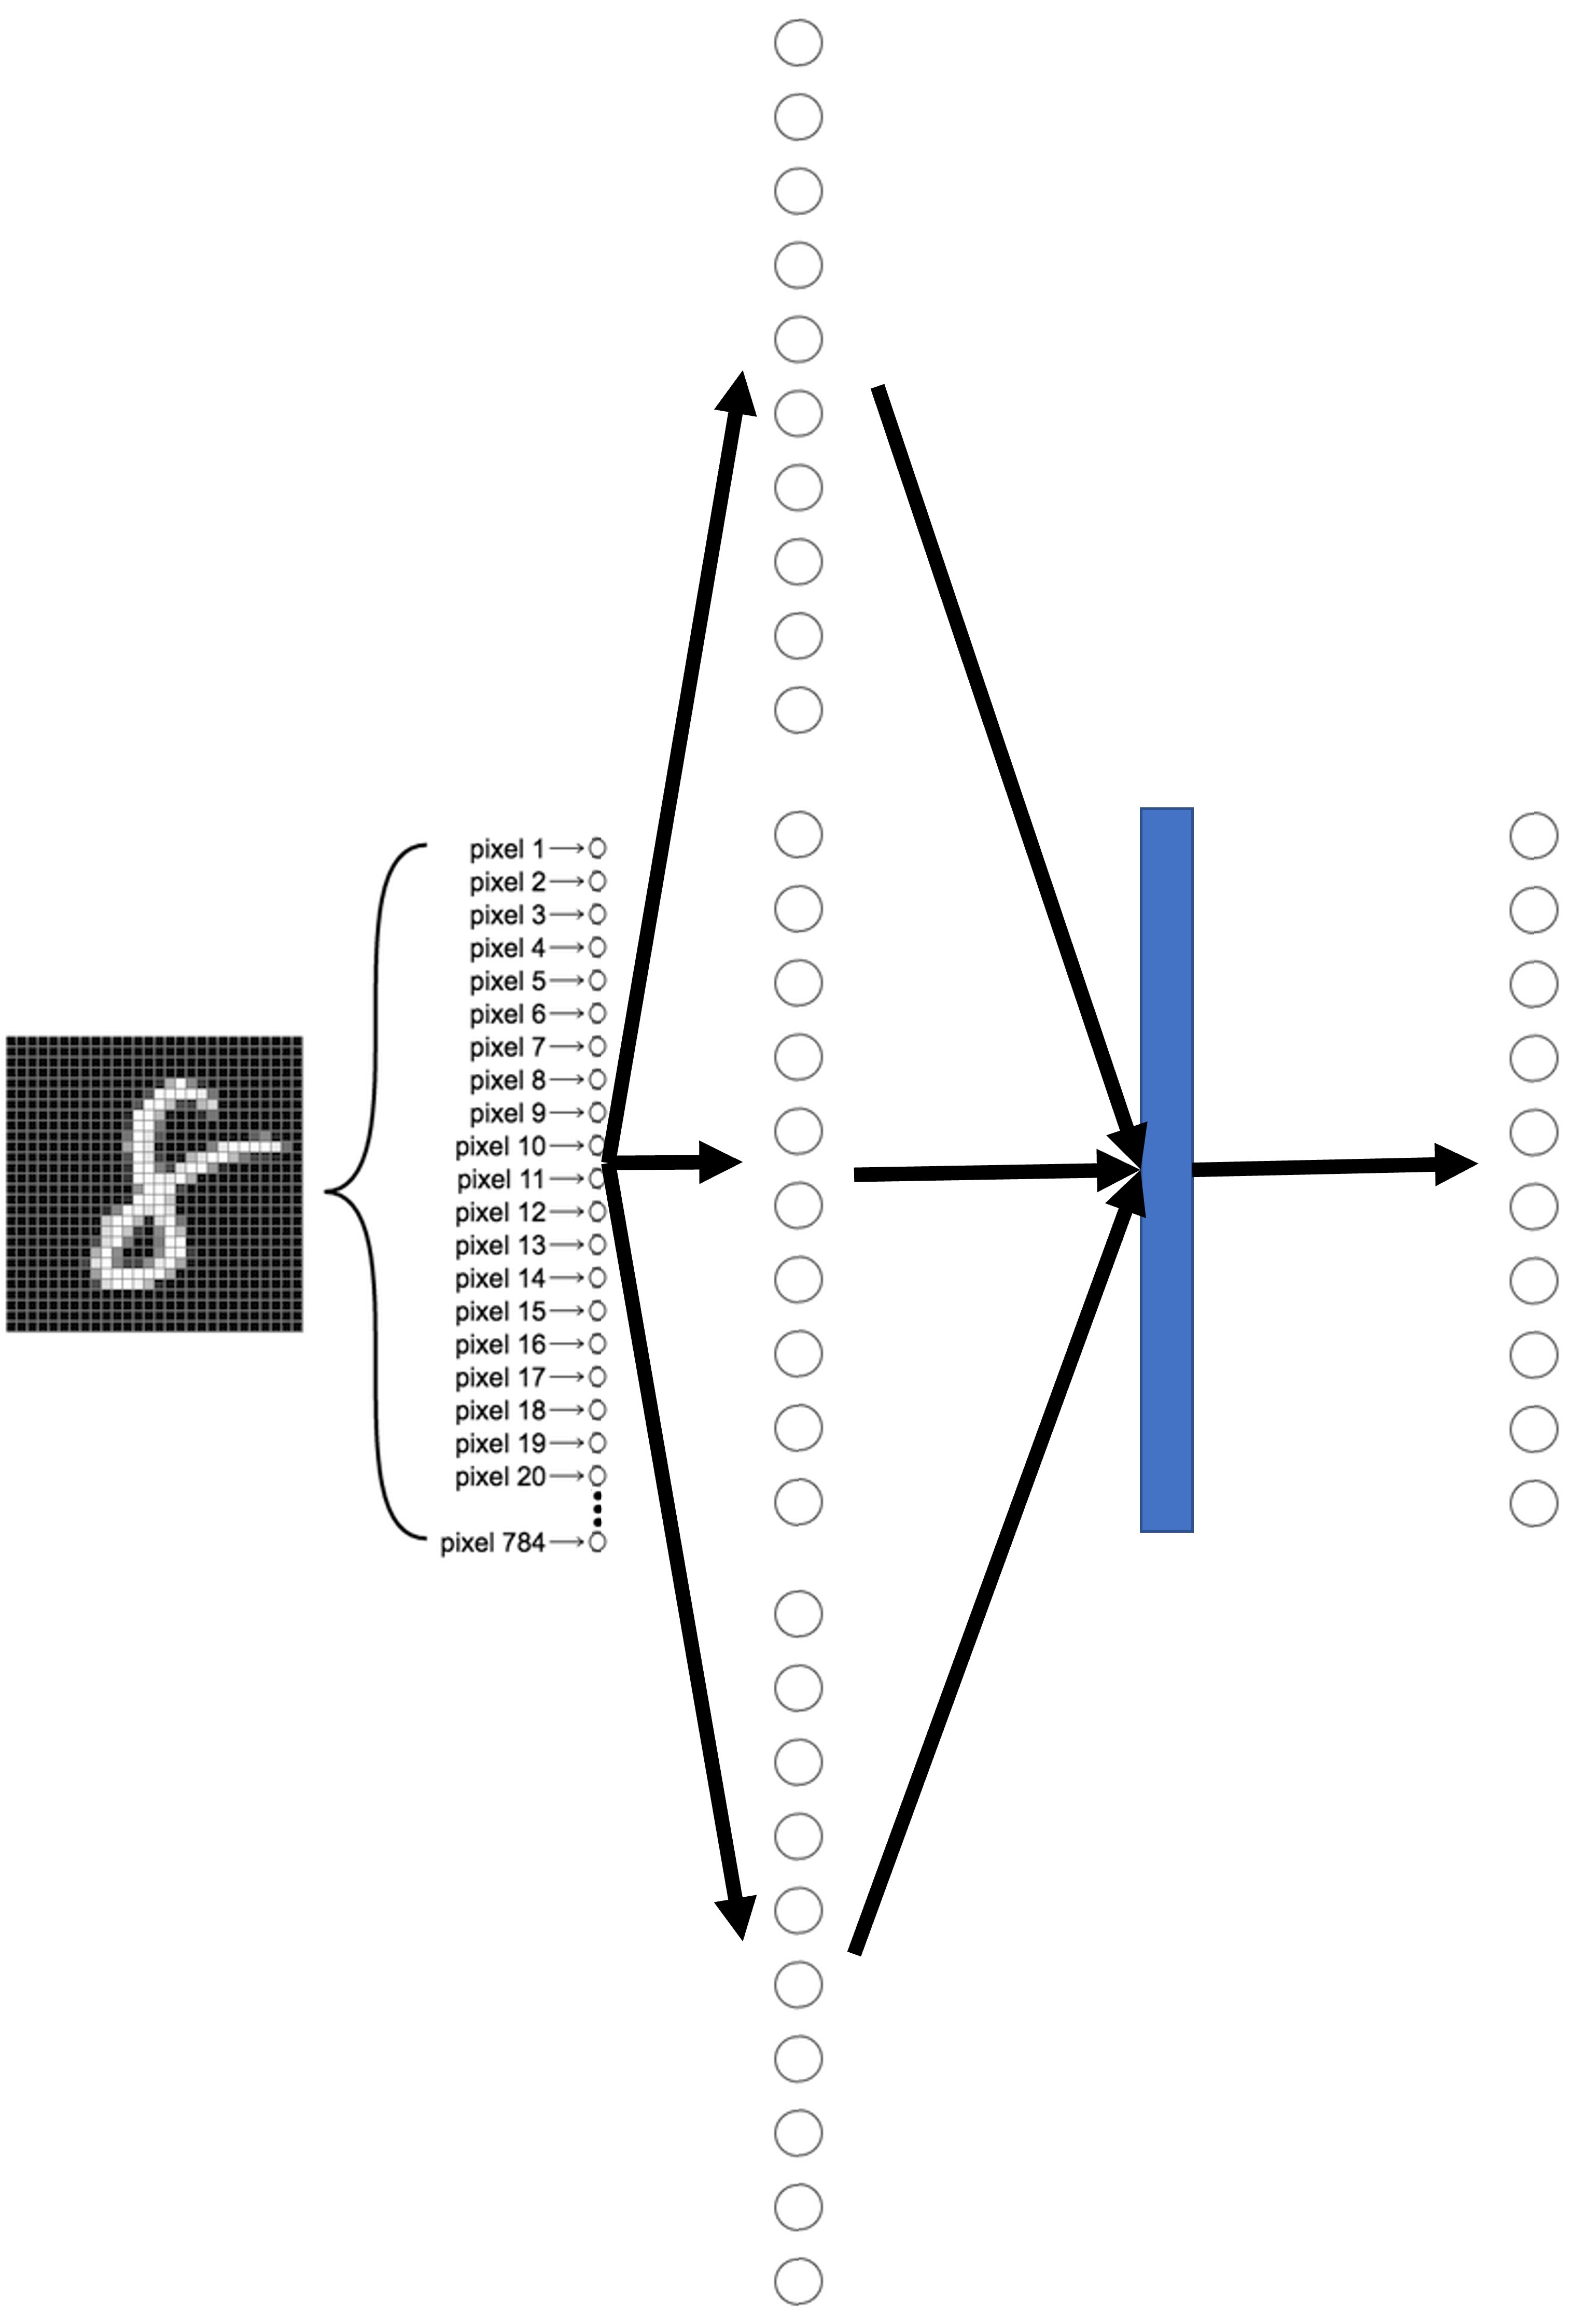

In [ ]:
# import the missing library
from tensorflow.keras.layers import Concatenate

# define the model with parallel layers


# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# train the model
model.fit(trainData, trainLabels, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback, es])

# check the performance in the test dataset
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=2)
print('\nTest accuracy:', test_acc)

# check tensorboard
%load_ext tensorboard
%tensorboard --logdir logs